<a href="https://colab.research.google.com/github/journey-Ji/Python-Data-Image/blob/main/KNN%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN 알고리즘


K-Nearest Neighbor
비지도학습의 가장 간단한 예시/
자신과 가까운 데이터를 찾아 자신의 레이블을 정

https://www.youtube.com/watch?v=QRWNto6BsfY

result :  [[0.]]
neighbours :  [[0. 0. 0.]]
distance :  [[173. 416. 577.]]


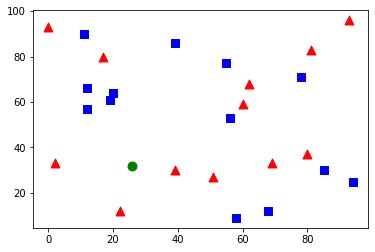

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#각 데이터의 위치 : 25 X 2크기에 각각 0~100
trainData=np.random.randint(0,100,(25,2)).astype(np.float32)
#각 데이터는 0 or 1
response=np.random.randint(0,2,(25,1)).astype(np.float32)

#값이 0인 데이터를 각각(x,y) 위치에 빨간색으로 칠합니다.
red=trainData[response.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
#값이 1인 데이터를 각각(x,y) 위치에 파란색으로 칠합니다.
blue=trainData[response.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

#(0~100, 0~100)위치의 데이터를 하나 생성해 칠합니다.
newcomer=np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

knn=cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,response)
ret,results,neighbours,dist=knn.findNearest(newcomer,3)

#가까운 3개를 찾고, 거리를 고려해 자신을 정합니다.
print('result : ',results)
print('neighbours : ',neighbours)
print('distance : ',dist)

plt.show()


# KNN 숫자인식 예제

In [ ]:
#파일용량이 작으면 아래 코드 이용하여 업로드 OK
from google.colab import files
uploaded = files.upload()

In [7]:
#파일용량이 클 경우에 아래코드를 이용하여 업로드
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


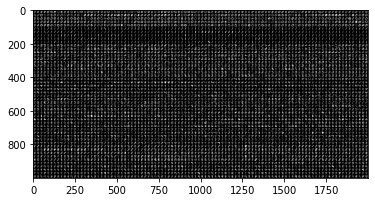

(50, 100, 20, 20)
(5000, 400)
(5000, 1)


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/Colab Notebooks/digits.png'

img=cv2.imread(filename)#digit.png파일을 직접 업로드 하였을 경우에 filename대신 'digit.png'를 변수로 사용가능
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img에 이미지 파일이 제대로 들어왔는지 확인!
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB))#(0,0)좌표의 수를 출력
plt.show()

#세로로 50줄, 가로로 100줄로 사진을 나눈다
cells=[np.hsplit(row,100) for row in np.vsplit(gray,50)]
x=np.array(cells)
print(x.shape) 

#각 (20X20)크기의 사진을 한 줄(1X400)으로 바꾼다.(이미지를 한줄의 벡터형태로 나타내는 작업)
train=x[:, :].reshape(-1,400).astype(np.float32)
print(train.shape)

#0이 500개, 1이 500개 , ...로 총 5,000개가 들어가는 (1x5000)배열을 만듭니다.
#즉, 0~9까지의 숫자를 각각 배열해놓는다는 의미
k=np.arange(10)
train_labels=np.repeat(k,500)[:,np.newaxis]

print(train_labels.shape)
np.savez("trained.npz",train=train,train_labels=train_labels)

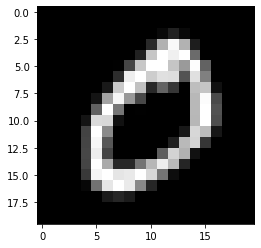

True

In [21]:
import matplotlib.pyplot as plt


#아래와 같이 하나씩 글자를 출력할 수 있다.
plt.imshow(cv2.cvtColor(x[0,0],cv2.COLOR_GRAY2RGB))#(0,0)좌표의 수를 출력
plt.show()

#아래와 같이 하나씩 글자를 저장할 수 있다.
cv2.imwrite('test_0.png',x[0,0])
cv2.imwrite('test_1.png',x[5,0])
cv2.imwrite('test_2.png',x[10,0])
cv2.imwrite('test_3.png',x[15,0])
cv2.imwrite('test_4.png',x[20,0])
cv2.imwrite('test_5.png',x[25,0])
cv2.imwrite('test_6.png',x[30,0])
cv2.imwrite('test_7.png',x[35,0])
cv2.imwrite('test_8.png',x[40,0])
cv2.imwrite('test_9.png',x[45,0])

KNN 숫자인식

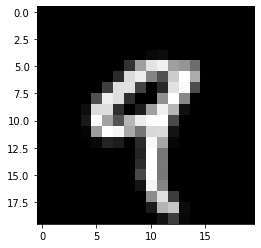

[[9.]]


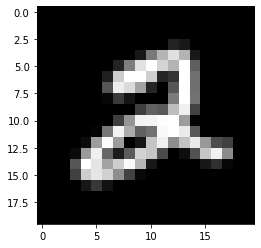

[[2.]]


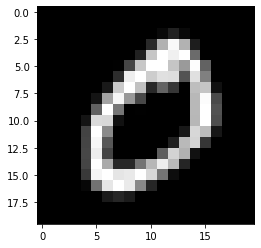

[[0.]]


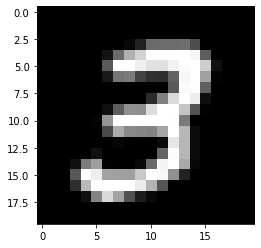

[[3.]]


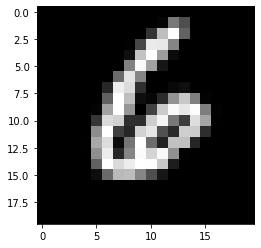

[[6.]]


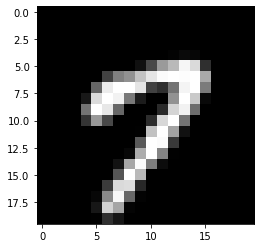

[[7.]]


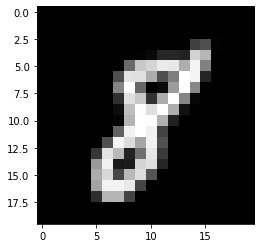

[[8.]]


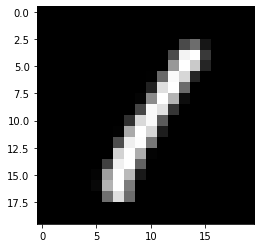

[[1.]]


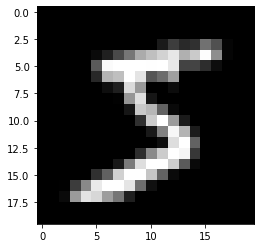

[[5.]]


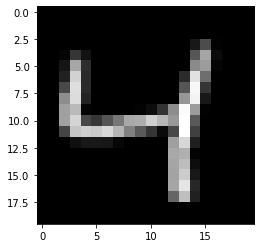

[[4.]]


In [22]:
import cv2
import numpy as np
import glob

FILE_NAME='trained.npz'

#파일로부터 학습 데이터를 불러옵니다.
def load_train_data(file_name):
  with np.load(file_name) as data:
    train=data['train']
    train_labels=data['train_labels']
  return train, train_labels
#손 글씨 이미지를 (20X20) 크기로 scaling합니다.
def resize20(image):
  img=cv2.imread(image)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  gray_resize=cv2.resize(gray,(20,20))
  plt.imshow(cv2.cvtColor(gray_resize,cv2.COLOR_GRAY2RGB))
  plt.show()
  #최종적으로는 (1X400)크기로 반환합니다.
  return gray_resize.reshape(-1,400).astype(np.float32)

def check(test,train,train_labels):
  knn=cv2.ml.KNearest_create()
  knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)
  #가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
  ret,result,neighbours,dist=knn.findNearest(test,k=5)
  return result

train,train_labels=load_train_data(FILE_NAME)

for file_name in glob.glob('./test_*.png'):
  test=resize20(file_name)
  result=check(test,train,train_labels)
  print(result)